#  6.6: Sourcing & Analyzing Time Series Data 

## Table of content:

### Task 1 - Install the Quandl library and register for a Quandl account as described in the Exercise.

### Task 2 - Find a data set to work and import it into your Jupyter notebook. Ensure that this data somehow connects to the broader research topic for your Achievement project. The best data set would be one that shares a common key with your main data set, such as a geographic component, so you can merge the data, but this could be difficult to find, so it’s not a requirement.

### Task 3 - Make a subset of your data set if necessary. Think about the historical domain of the series to decide if you need to (if there are irrelevant historical events in your data that would bias your analysis, for example). Also, make sure your set doesn’t include any forecasted data.


### Task 4 - Create a line chart of your data.

### Task 5 - Decompose the data’s components.

- Analyze the results from the plot in a markdown cell.

### Task 6 - Conduct a Dickey-Fuller test to check for stationarity.

- Interpret the results in a markdown cell and reference your null hypothesis.

### Task 7 - If your data isn’t stationary, conduct a round of differencing on it and repeat step 6.

### Task 8 - If your data still isn’t stationary, perform another round of differencing and repeat step 6.

### Task 9 - Check your data’s autocorrelations.

***
***

## Task 1 - Install the Quandl library and register for a Quandl account as described in the Exercise.

## Task 2 - Find a data set to work and import it into your Jupyter notebook. Ensure that this data somehow connects to the broader research topic for your Achievement project. The best data set would be one that shares a common key with your main data set, such as a geographic component, so you can merge the data, but this could be difficult to find, so it’s not a requirement.

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# Ensure charts are displayed in notebook
%matplotlib inline

In [3]:
# Define path

path = r'C:\Users\facun\Desktop\Data Analysis\CF\Data Immersion\Achievement 6'

In [4]:
# Import data

gun_violence_df = pd.read_csv(os.path.join(path, 'Data Sets','Prepared', 'new_dataset.csv'))

### EDA

In [5]:
gun_violence_df.head()

,Unnamed: 0,incident_id,year,month,day,day_of_week,state,city_or_county,n_guns_involved,n_killed,...,victim_0-17,victim_18-30,victim_31-45,victim_46-60,victim_61+,suspect_0-17,suspect_18-30,suspect_31-45,suspect_46-60,suspect_61+
0,0,461105,2013,1,1,Tuesday,Pennsylvania,Mckeesport,NaN,0,...,0,1,0,0,0,0,0,0,0,0
1,1,460726,2013,1,1,Tuesday,California,Hawthorne,NaN,1,...,0,1,0,0,0,0,0,0,0,0
2,2,478855,2013,1,1,Tuesday,Ohio,Lorain,2.0,1,...,0,0,3,0,0,0,1,1,0,0
3,3,478925,2013,1,5,Saturday,Colorado,Aurora,NaN,4,...,0,1,1,1,0,0,0,1,0,0
4,4,478959,2013,1,7,Monday,North Carolina,Greensboro,2.0,2,...,1,1,0,1,0,0,0,0,1,0


In [6]:
gun_violence_df.shape

(239677, 27)

In [7]:
gun_violence_df.columns

Index(['Unnamed: 0', 'incident_id', 'year', 'month', 'day', 'day_of_week',
       'state', 'city_or_county', 'n_guns_involved', 'n_killed', 'n_injured',
       'victim_count', 'suspect_count', 'male_victims_count',
       'female_victims_count', 'male_suspects_count', 'female_suspects_count',
       'victim_0-17', 'victim_18-30', 'victim_31-45', 'victim_46-60',
       'victim_61+', 'suspect_0-17', 'suspect_18-30', 'suspect_31-45',
       'suspect_46-60', 'suspect_61+'],
      dtype='object')

In [8]:
gun_violence_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             239677 non-null  int64  
 1   incident_id            239677 non-null  int64  
 2   year                   239677 non-null  int64  
 3   month                  239677 non-null  int64  
 4   day                    239677 non-null  int64  
 5   day_of_week            239677 non-null  object 
 6   state                  239677 non-null  object 
 7   city_or_county         239677 non-null  object 
 8   n_guns_involved        140226 non-null  float64
 9   n_killed               239677 non-null  int64  
 10  n_injured              239677 non-null  int64  
 11  victim_count           239677 non-null  int64  
 12  suspect_count          239677 non-null  int64  
 13  male_victims_count     239677 non-null  int64  
 14  female_victims_count   239677 non-nu

In [9]:
#Checked for duplicates
gun_violence_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
239672    False
239673    False
239674    False
239675    False
239676    False
Length: 239677, dtype: bool

In [10]:
#Deleted unnecessary columns
gun_violence_df = gun_violence_df.drop(columns=['Unnamed: 0'])

In [11]:
#Checked for missing values 
gun_violence_df.isnull().sum()

incident_id                  0
year                         0
month                        0
day                          0
day_of_week                  0
state                        0
city_or_county               0
n_guns_involved          99451
n_killed                     0
n_injured                    0
victim_count                 0
suspect_count                0
male_victims_count           0
female_victims_count         0
male_suspects_count          0
female_suspects_count        0
victim_0-17                  0
victim_18-30                 0
victim_31-45                 0
victim_46-60                 0
victim_61+                   0
suspect_0-17                 0
suspect_18-30                0
suspect_31-45                0
suspect_46-60                0
suspect_61+                  0
dtype: int64

In [12]:
# Calculate the median of the 'n_guns_involved' column
median_guns = gun_violence_df['n_guns_involved'].median()

# Fill missing values in 'n_guns_involved' with the median
gun_violence_df['n_guns_involved'] = gun_violence_df['n_guns_involved'].fillna(median_guns)

In [13]:
#Checked for missing values 
gun_violence_df.isnull().sum()

incident_id              0
year                     0
month                    0
day                      0
day_of_week              0
state                    0
city_or_county           0
n_guns_involved          0
n_killed                 0
n_injured                0
victim_count             0
suspect_count            0
male_victims_count       0
female_victims_count     0
male_suspects_count      0
female_suspects_count    0
victim_0-17              0
victim_18-30             0
victim_31-45             0
victim_46-60             0
victim_61+               0
suspect_0-17             0
suspect_18-30            0
suspect_31-45            0
suspect_46-60            0
suspect_61+              0
dtype: int64

Based on that we will work with time series, i combined the column "year", "month" and "day" into one column called "date"

In [14]:
# Combining the 'year', 'month', and 'day' columns into a single 'date' column
gun_violence_df['date'] = pd.to_datetime(gun_violence_df[['year', 'month', 'day']])

# Displaying the first few rows to confirm the addition of the 'date' column
gun_violence_df.head()

,incident_id,year,month,day,day_of_week,state,city_or_county,n_guns_involved,n_killed,n_injured,...,victim_18-30,victim_31-45,victim_46-60,victim_61+,suspect_0-17,suspect_18-30,suspect_31-45,suspect_46-60,suspect_61+,date
0,461105,2013,1,1,Tuesday,Pennsylvania,Mckeesport,1.0,0,4,...,1,0,0,0,0,0,0,0,0,2013-01-01
1,460726,2013,1,1,Tuesday,California,Hawthorne,1.0,1,3,...,1,0,0,0,0,0,0,0,0,2013-01-01
2,478855,2013,1,1,Tuesday,Ohio,Lorain,2.0,1,3,...,0,3,0,0,0,1,1,0,0,2013-01-01
3,478925,2013,1,5,Saturday,Colorado,Aurora,1.0,4,0,...,1,1,1,0,0,0,1,0,0,2013-01-05
4,478959,2013,1,7,Monday,North Carolina,Greensboro,2.0,2,2,...,1,0,1,0,0,0,0,1,0,2013-01-07


In [15]:
# Creating the 'n_participants' column with the sum of 'victim_count' and 'suspect_count'
gun_violence_df['n_participants'] = gun_violence_df['victim_count'] + gun_violence_df['suspect_count']

# Displaying the first few rows to confirm the addition of the 'n_participants' column
gun_violence_df.head()

,incident_id,year,month,day,day_of_week,state,city_or_county,n_guns_involved,n_killed,n_injured,...,victim_31-45,victim_46-60,victim_61+,suspect_0-17,suspect_18-30,suspect_31-45,suspect_46-60,suspect_61+,date,n_participants
0,461105,2013,1,1,Tuesday,Pennsylvania,Mckeesport,1.0,0,4,...,0,0,0,0,0,0,0,0,2013-01-01,5
1,460726,2013,1,1,Tuesday,California,Hawthorne,1.0,1,3,...,0,0,0,0,0,0,0,0,2013-01-01,5
2,478855,2013,1,1,Tuesday,Ohio,Lorain,2.0,1,3,...,3,0,0,0,1,1,0,0,2013-01-01,5
3,478925,2013,1,5,Saturday,Colorado,Aurora,1.0,4,0,...,1,1,0,0,0,1,0,0,2013-01-05,4
4,478959,2013,1,7,Monday,North Carolina,Greensboro,2.0,2,2,...,0,1,0,0,0,0,1,0,2013-01-07,4


In [16]:
gun_violence_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   incident_id            239677 non-null  int64         
 1   year                   239677 non-null  int64         
 2   month                  239677 non-null  int64         
 3   day                    239677 non-null  int64         
 4   day_of_week            239677 non-null  object        
 5   state                  239677 non-null  object        
 6   city_or_county         239677 non-null  object        
 7   n_guns_involved        239677 non-null  float64       
 8   n_killed               239677 non-null  int64         
 9   n_injured              239677 non-null  int64         
 10  victim_count           239677 non-null  int64         
 11  suspect_count          239677 non-null  int64         
 12  male_victims_count     239677 non-null  int6

## Task 3 - Make a subset of your data set if necessary. Think about the historical domain of the series to decide if you need to

### Subset of  number of incidents we have day

In [17]:
# Grouping by 'date' and then counting the unique 'incident_id' values for each day
incidents_per_day_subset = gun_violence_df.groupby('date')['incident_id'].nunique().reset_index(name='incidents_per_day')

# For incidents per day subset, setting "date" as index
incidents_per_day_subset.set_index('date', inplace=True)

# Displaying the first few rows of the newly created subset
incidents_per_day_subset.head()


,incidents_per_day
date,
2013-01-01,3
2013-01-05,1
2013-01-07,2
2013-01-19,1
2013-01-21,2


### Subset with the average of guns involved per incident per day

In [18]:
# Grouping by 'date' and then calculating the average of 'n_guns_involved' for each day
avg_guns_involved_per_incident_subset = gun_violence_df.groupby('date')['n_guns_involved'].mean().reset_index(name='avg_guns_involved_per_day')

# For average guns involved per day subset, setting "date" as index
avg_guns_involved_per_incident_subset.set_index('date', inplace=True)

# Displaying the first few rows of the newly created subset
avg_guns_involved_per_incident_subset.head()


,avg_guns_involved_per_day
date,
2013-01-01,1.333333
2013-01-05,1.000000
2013-01-07,1.500000
2013-01-19,2.000000
2013-01-21,1.000000


### Subset with the average of victims per incident per day

In [19]:
# Grouping by 'date' and calculating the average 'victim_count' per incident for each day
avg_victims_per_day_subset = gun_violence_df.groupby('date')['victim_count'].mean().reset_index(name='avg_victims_per_incident')

# For average victims per incident per day subset, setting "date" as index
avg_victims_per_day_subset.set_index('date', inplace=True)

# Displaying the first few rows of the newly created subset
avg_victims_per_day_subset.head()



,avg_victims_per_incident
date,
2013-01-01,3.666667
2013-01-05,3.000000
2013-01-07,3.500000
2013-01-19,5.000000
2013-01-21,4.500000


## Task 4 - Create a line chart of your data.

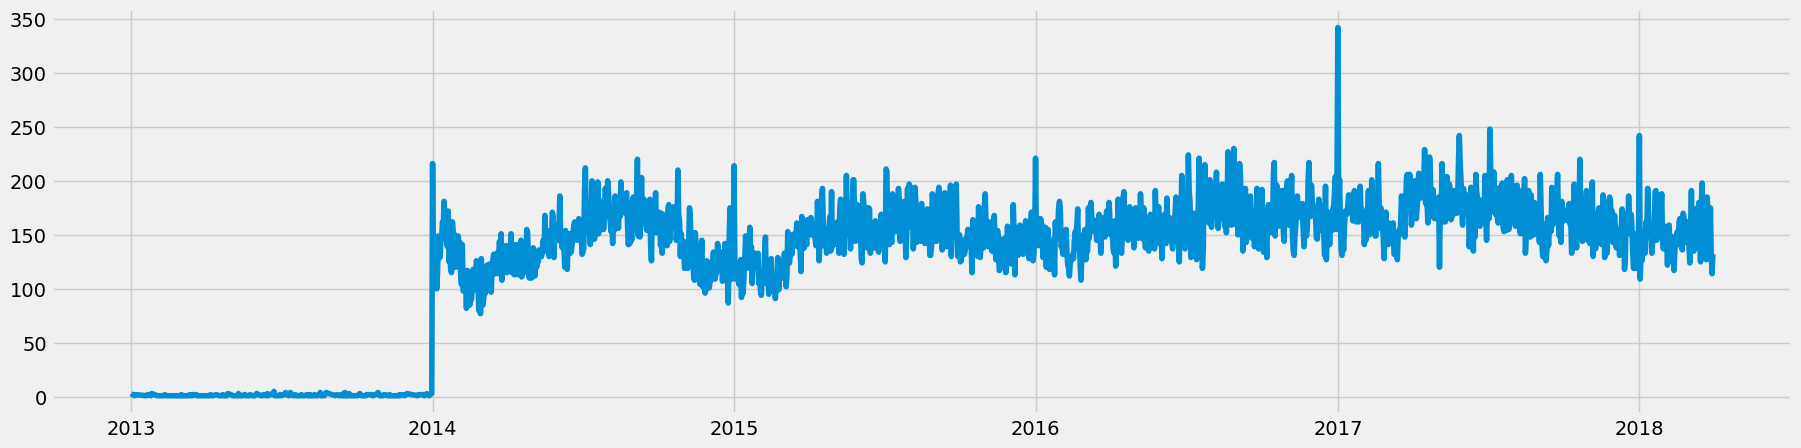

In [20]:
# Plot the incidents_per_day_subset using matplotlib.

plt.figure(figsize=(20,5), dpi=100) 

plt.plot(incidents_per_day_subset)

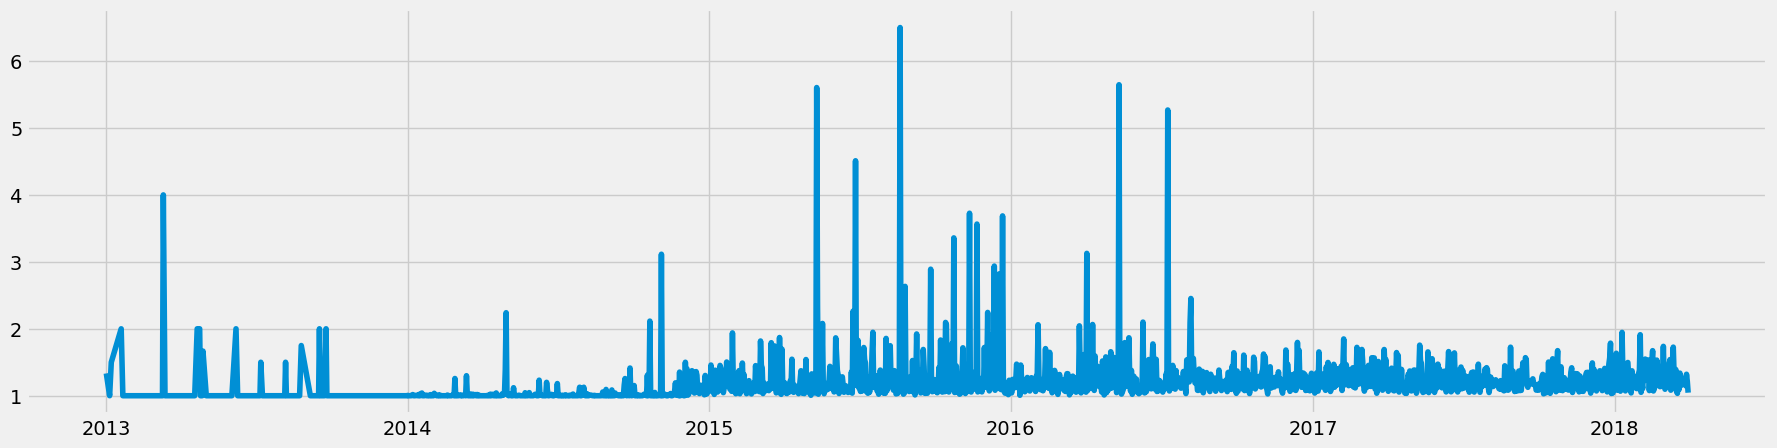

In [21]:
# Plot the incidents_per_day_subset using matplotlib.

plt.figure(figsize=(20,5), dpi=100) 

plt.plot(avg_guns_involved_per_incident_subset)

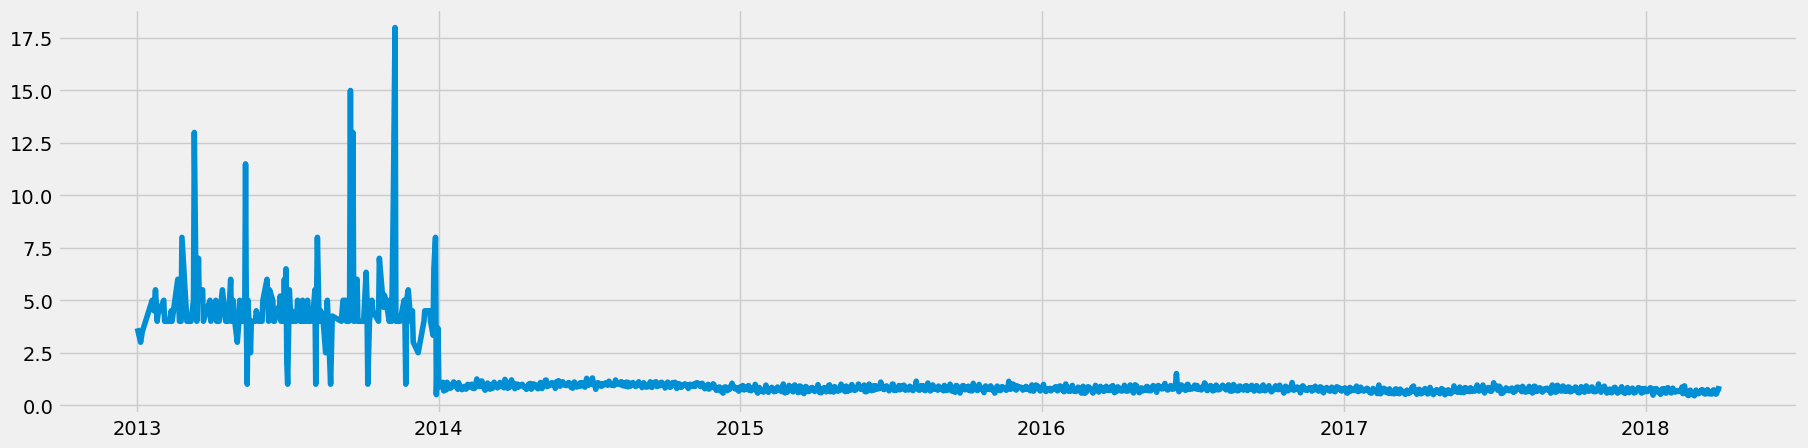

In [22]:
# Plot the incidents_per_day_subset using matplotlib.

plt.figure(figsize=(20,5), dpi=100) 

plt.plot(avg_victims_per_day_subset)

## Task 5 - Decompose the data’s components.

#### - Analyze the results from the plot in a markdown cell.


In [23]:
# Resampling the data to ensure continuous dates with a daily frequency
incidents_per_day_resampled = incidents_per_day_subset.resample('D').asfreq().fillna(0)


#### Note: Why we do Resampling of data

-    Regular Intervals: Time series analysis often requires the data to be at regular intervals (like daily, weekly, monthly). If your original data has missing dates or irregular intervals, resampling helps to standardize it, ensuring that each time unit (like each day) is represented.

-    Handling Missing Data: When resampling, you can fill in missing dates, which is crucial for accurate analysis. In the case of seasonal_decompose, the function expects no missing values. By resampling and filling in these gaps (often with zeros or other imputation methods), you maintain the continuity and integrity of the time series.

-    Consistency for Analysis: Regular intervals allow for consistent and meaningful comparisons over time. This is particularly important for identifying patterns, trends, and seasonal variations.

In [24]:

# Decomposing the time series
decomposition = sm.tsa.seasonal_decompose(incidents_per_day_resampled, model='additive')

In [25]:
# Define fixed size for all charts
from pylab import rcParams 
rcParams['figure.figsize'] = 18, 7

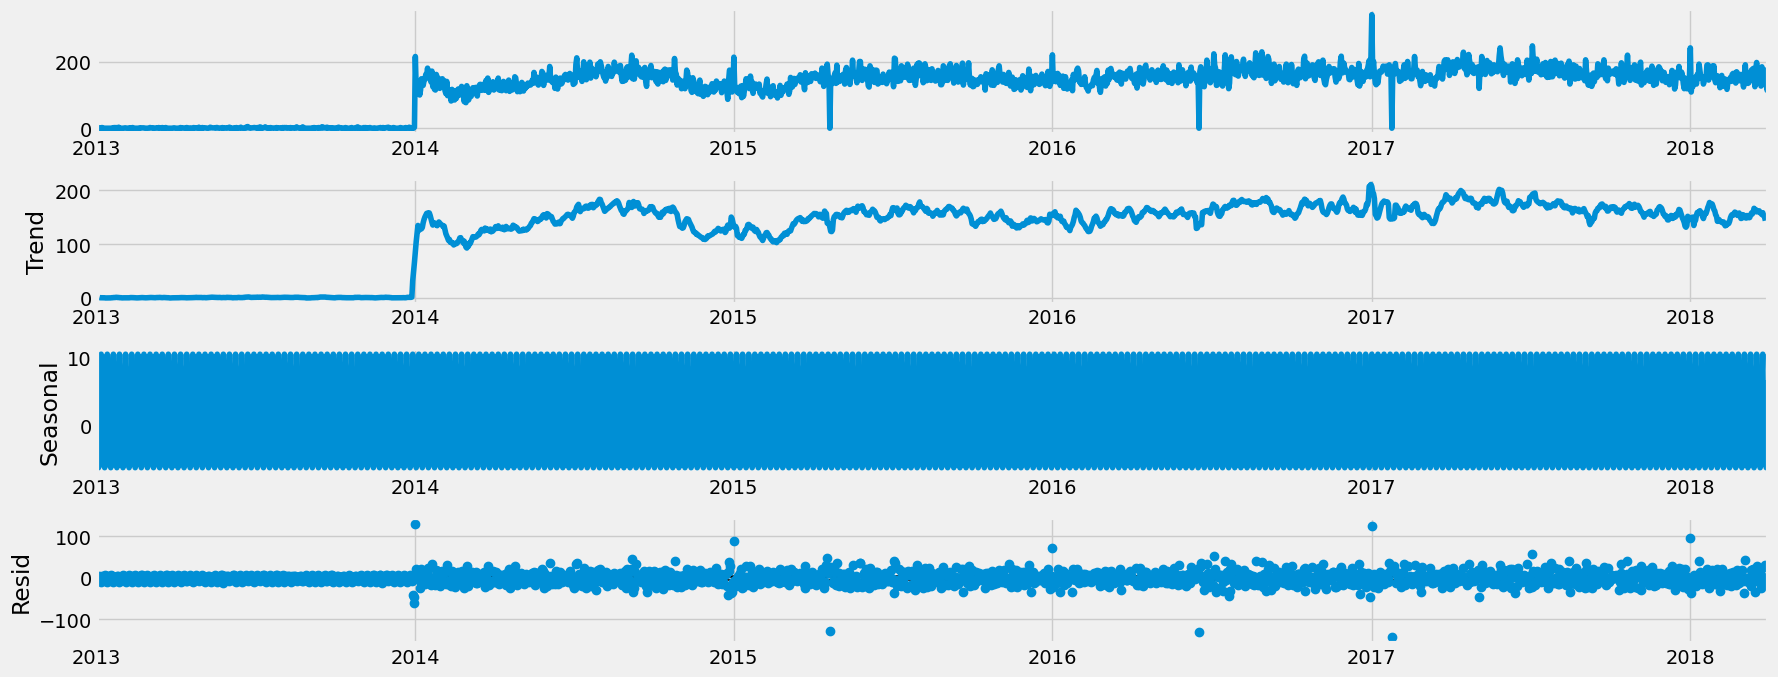

In [26]:
# Plotting the decomposition
fig = decomposition.plot()

# Explicitly displaying the plot
plt.show()

1. **Observed:** Shows the actual number of incidents per day in your dataset.

2. **Trend:** Highlights the long-term increase or decrease in incidents, smoothing out short-term fluctuations.

3. **Seasonal:** Reveals any repeating patterns or cycles in the data, such as weekly trends.

4. **Residual:** Represents the noise or randomness left after removing the trend and seasonal patterns.

This decomposition helps to understand the underlying patterns in your time series data, including long-term changes, recurring cycles, and unexplained variations.

## Task 6 - Conduct a Dickey-Fuller test to check for stationarity.

#### -  Interpret the results in a markdown cell and reference your null hypothesis.


In [27]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(incidents_per_day_resampled['incidents_per_day'])

Dickey-Fuller Stationarity test:
Test Statistic                   -2.157588
p-value                           0.221997
Number of Lags Used              26.000000
Number of Observations Used    1889.000000
Critical Value (1%)              -3.433816
Critical Value (5%)              -2.863071
Critical Value (10%)             -2.567585
dtype: float64


1. **Test Statistic (-2.157588):** This value is crucial for the test. The more negative the test statistic, the stronger the evidence against the null hypothesis. In our case, the test statistic is -2.157588.

2. **p-value (0.221997):** This value tells you the probability of finding the observed results when the null hypothesis of non-stationarity is true. In simpler terms, a low p-value (usually less than 0.05) suggests that you can reject the null hypothesis, indicating that the series is stationary. Our **p-value is 0.221997**, which is relatively high, suggesting that **we cannot reject the null hypothesis of non-stationarity**.

3. **Number of Lags Used (26):** This shows how many lagged values of the series were used in the test. The number of lags can affect the sensitivity of the test to the presence of stationarity.

4. **Number of Observations Used (1889):** This is the number of data points used in the analysis, after accounting for the lags.

5. **Critical Values:** These values are thresholds for the test statistic at the 1%, 5%, and 10% confidence levels. To reject the null hypothesis, our test statistic needs to be more negative than these values. For our data, the critical values are -3.433816 (1%), -2.863071 (5%), and -2.567585 (10%).

Overall Interpretation:

- Your test statistic (-2.157588) is not more negative than any of the critical values.
- The p-value is much higher than the standard 0.05 threshold.

Based on these results, the time series appears to be non-stationary. This implies that the statistical properties of your time series data (like mean and variance) are not consistent over time

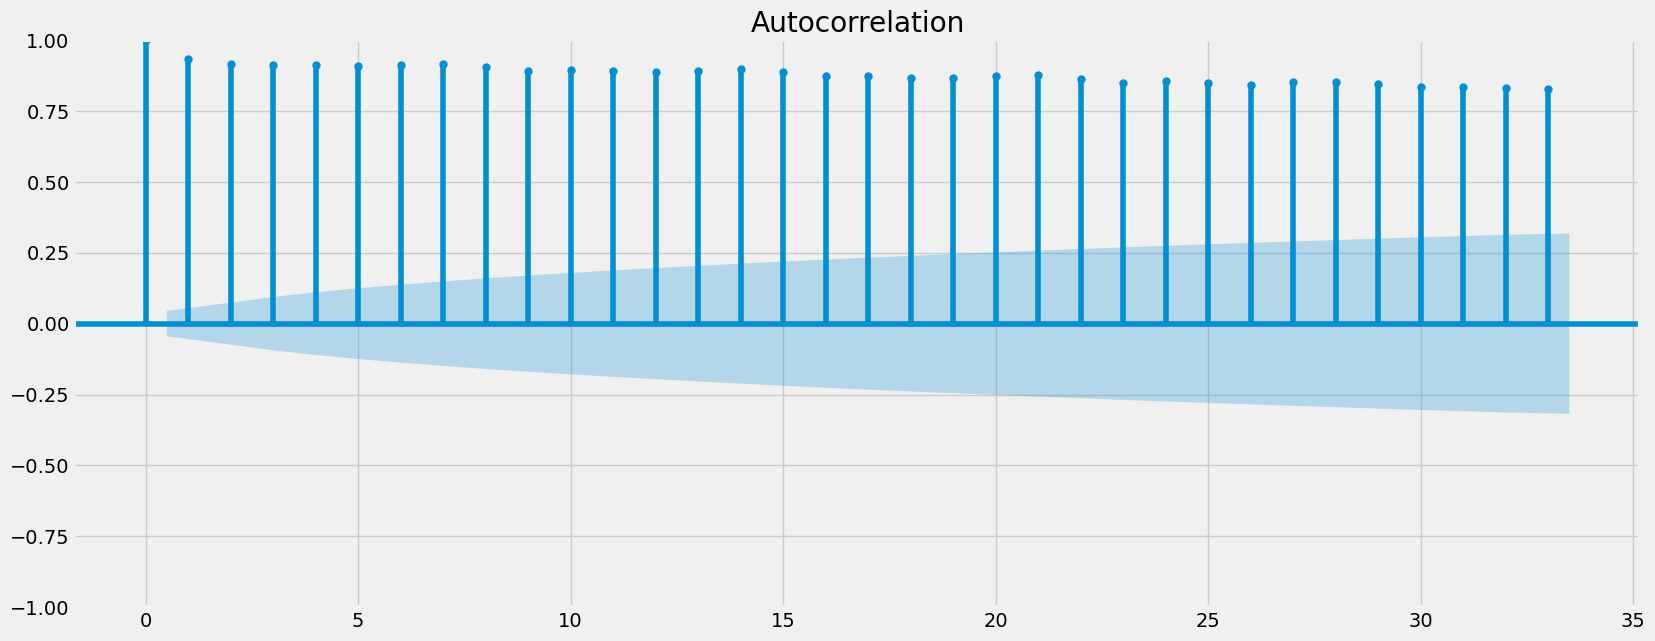

In [28]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(incidents_per_day_resampled)
plt.show()

## Task 7 - If your data isn’t stationary, conduct a round of differencing on it and repeat step 6.

In [37]:
differenced_data  = incidents_per_day_resampled - incidents_per_day_resampled.shift(1)


In [38]:
# Applying Differencing:
differenced_data.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.


In [39]:
differenced_data.head()

,incidents_per_day
date,
2013-01-02,-3.0
2013-01-03,0.0
2013-01-04,0.0
2013-01-05,1.0
2013-01-06,-1.0


In [40]:
dickey_fuller(differenced_data)


Dickey-Fuller Stationarity test:
Test Statistic                -1.015733e+01
p-value                        7.668375e-18
Number of Lags Used            2.600000e+01
Number of Observations Used    1.888000e+03
Critical Value (1%)           -3.433818e+00
Critical Value (5%)           -2.863072e+00
Critical Value (10%)          -2.567586e+00
dtype: float64


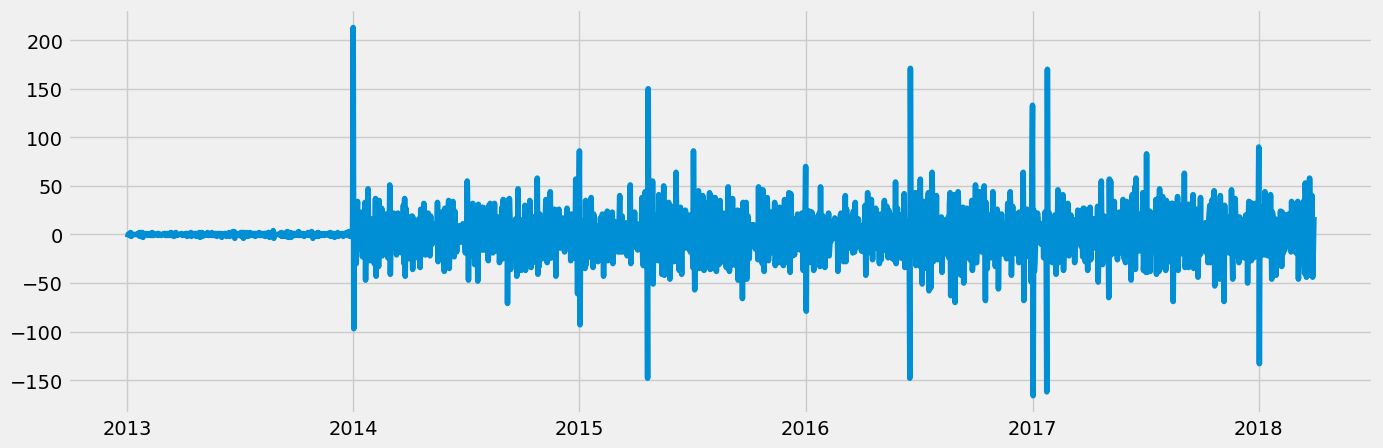

In [41]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(differenced_data)

### Results:

1. **Test Statistic (-10.15733):** This value is significantly more negative than any of the critical values. The test statistic being this negative is a strong indication against the null hypothesis of non-stationarity.

2. **p-value (7.668375e-18):** This is extremely low (practically zero), far below the common threshold of 0.05. A low p-value like this strongly suggests that the null hypothesis of non-stationarity can be rejected, indicating that the differenced time series is stationary.

3. **Number of Lags Used (26):** This indicates the number of lagged observations that the test considered in its calculations.

4. **Number of Observations Used (1888):** The number of data points used in the analysis, after accounting for the lags.

5. **Critical Values:**
    - **1% Level (-3.433818):** The test statistic is more negative than this, suggesting stationarity at a 99% confidence level.
    - **5% Level (-2.863072):** The test statistic is more negative than this as well, indicating stationarity at a 95% confidence level.
    - **10% Level (-2.567586):** Again, the test statistic is more negative, indicating stationarity at a 90% confidence level.

**Overall Interpretation:** Based on these results, especially the very negative test statistic and the extremely low p-value, we can confidently conclude that our differenced time series data is stationary. This means that the statistical properties of the series (like the mean and variance) do not change over time, making it suitable for further time series analysis and modeling.

## Task 9 - Check your data’s autocorrelations.

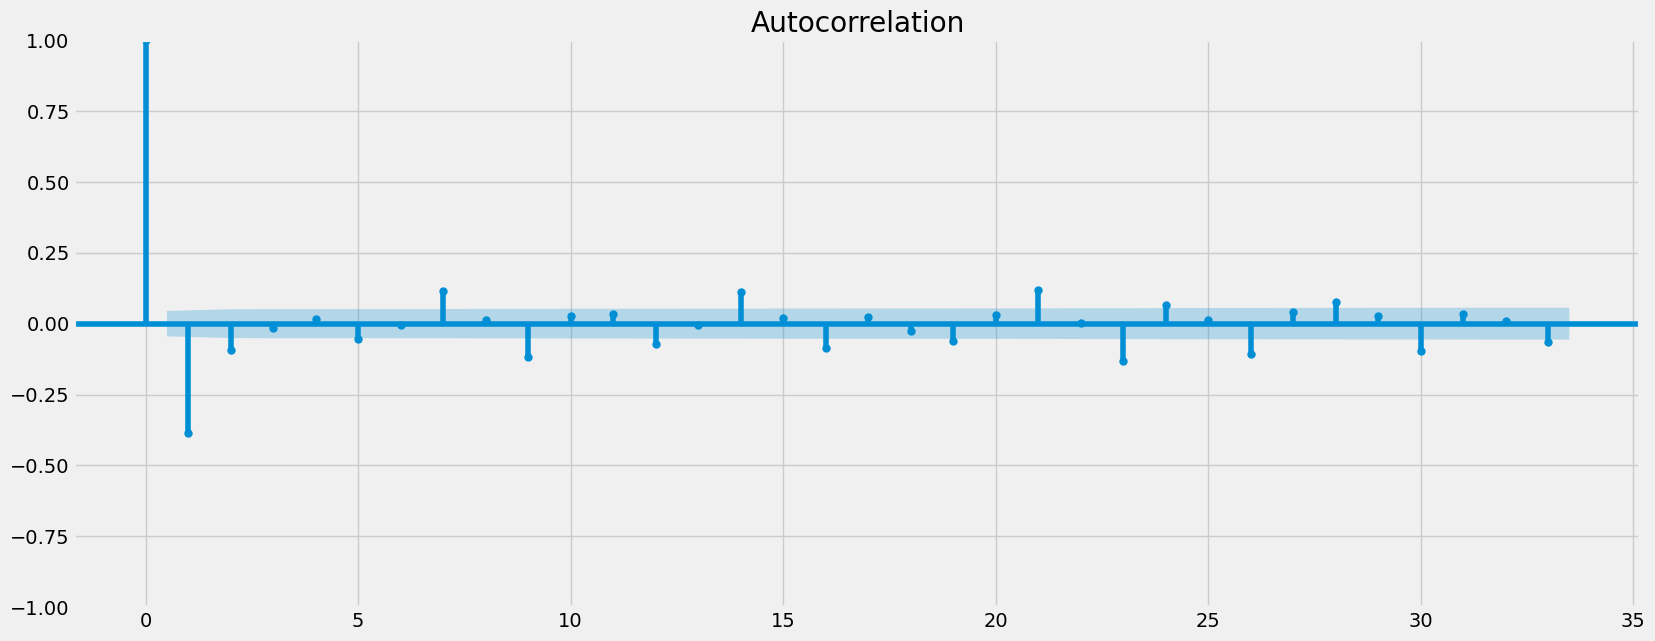

In [42]:
plot_acf(differenced_data)
plt.show()